# Exploratory Data Analysis Starter

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client_df = pd.read_csv('data/client_data.csv')
price_df = pd.read_csv('data/price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

### Client data
- `id`: , Identifier
- `channel_sales`: Categorical
- `cons_12m`: Numeric
- `cons_gas_12m`: Numeric
- `cons_last_month`: Numeric
- `date_activ`: Datetime
- `date_end`: Datetime
- `date_modif_prod`: Datetime
- `date_renewal`: Datetime
- `forecast_cons_12m`: Numeric
- `forecast_cons_year`: Numeric
- `has_gas`: Binary (Treated in data as categorical)
- `imp_cons`: Numeric
- `margin_gross_pow_ele`: Numeric
- `margin_net_pow_ele`: Numeric
- `nb_prod_act`: Numeric
- `net_margin`: Numeric
- `num_years_antig`: Numeric
- `origin_up`: Categorical
- `pow_max`: Numeric
- `churn`: Binary (Treated in data as numeric)

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

### Pricing data
- `id`: Categorical, Identifier
- `price_date`: Datetime
- `price_off_peak_var`: Numeric
- `price_peak_var`: Numeric
- `price_mid_peak_var`: Numeric
- `price_off_peak_fix`: Numeric
- `price_peak_fix`: Numeric
- `price_mid_peak_fix`: Numeric

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.
- Distributions of `cons_gas_12m`, `cons_last_month`, `forecast_cons_year`, `forecast_discount_energy`, `forecast_meter_rent_12m`, `imp_cons`, `margin_gross_pow_ele`, `margin_net_pow_ele`, `nb_prod_act`, `net_margin`, `pow_max` appear to be significantly skewed to the right.
- Distribution of `forecast_price_pow_off_peak` appears to be significantly skewed to the left.

In [7]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [8]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


### Null and counts of unique values
- https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/
- `channel_sales` and `origin_up` in `client_df` have missing values.
- Counts ensures that binary features `has_gas` and `churn` have only 2 unique values.

In [9]:
# No null values
display(client_df.isna().any())
display(price_df.isna().any())

id                                False
channel_sales                     False
cons_12m                          False
cons_gas_12m                      False
cons_last_month                   False
date_activ                        False
date_end                          False
date_modif_prod                   False
date_renewal                      False
forecast_cons_12m                 False
forecast_cons_year                False
forecast_discount_energy          False
forecast_meter_rent_12m           False
forecast_price_energy_off_peak    False
forecast_price_energy_peak        False
forecast_price_pow_off_peak       False
has_gas                           False
imp_cons                          False
margin_gross_pow_ele              False
margin_net_pow_ele                False
nb_prod_act                       False
net_margin                        False
num_years_antig                   False
origin_up                         False
pow_max                           False


id                    False
price_date            False
price_off_peak_var    False
price_peak_var        False
price_mid_peak_var    False
price_off_peak_fix    False
price_peak_fix        False
price_mid_peak_fix    False
dtype: bool

In [10]:
# https://stackoverflow.com/questions/21319929/how-to-determine-whether-a-pandas-column-contains-a-particular-value
print("client_df COLUMNS")
for column in client_df.columns:
    has_missing = 'MISSING' in client_df[column].values
    print(column + " has MISSING: " + str(has_missing))
print("price_df COLUMNS")
for column in price_df.columns:
    has_missing = 'MISSING' in price_df[column].values
    print(column + " has MISSING: " + str(has_missing))

client_df COLUMNS
id has MISSING: False
channel_sales has MISSING: True
cons_12m has MISSING: False
cons_gas_12m has MISSING: False
cons_last_month has MISSING: False
date_activ has MISSING: False
date_end has MISSING: False
date_modif_prod has MISSING: False
date_renewal has MISSING: False
forecast_cons_12m has MISSING: False
forecast_cons_year has MISSING: False
forecast_discount_energy has MISSING: False
forecast_meter_rent_12m has MISSING: False
forecast_price_energy_off_peak has MISSING: False
forecast_price_energy_peak has MISSING: False
forecast_price_pow_off_peak has MISSING: False
has_gas has MISSING: False
imp_cons has MISSING: False
margin_gross_pow_ele has MISSING: False
margin_net_pow_ele has MISSING: False
nb_prod_act has MISSING: False
net_margin has MISSING: False
num_years_antig has MISSING: False
origin_up has MISSING: True
pow_max has MISSING: False
churn has MISSING: False
price_df COLUMNS
id has MISSING: False
price_date has MISSING: False
price_off_peak_var has MI

In [11]:
# Counts of unique values
display(client_df.nunique())
display(price_df.nunique())

id                                14606
channel_sales                         8
cons_12m                          11065
cons_gas_12m                       2112
cons_last_month                    4751
date_activ                         1796
date_end                            368
date_modif_prod                    2129
date_renewal                        386
forecast_cons_12m                 13993
forecast_cons_year                 4218
forecast_discount_energy             12
forecast_meter_rent_12m            3528
forecast_price_energy_off_peak      516
forecast_price_energy_peak          329
forecast_price_pow_off_peak          41
has_gas                               2
imp_cons                           7752
margin_gross_pow_ele               2391
margin_net_pow_ele                 2391
nb_prod_act                          10
net_margin                        11965
num_years_antig                      13
origin_up                             6
pow_max                             698


id                    16096
price_date               12
price_off_peak_var     1853
price_peak_var         1189
price_mid_peak_var      711
price_off_peak_fix       66
price_peak_fix           31
price_mid_peak_fix       28
dtype: int64

In [12]:
# Categories in categorical features
categorical_cols_client = ["channel_sales", "forecast_discount_energy", "has_gas", "nb_prod_act", "num_years_antig", "origin_up", "churn",]
for col in categorical_cols_client:
    print("Categories in " + str(col) + ": " + str(client_df[col].unique()))

categorical_cols_price = ["price_date",]
for col in categorical_cols_price:
    print("Categories in " + str(col) + ": " + str(price_df[col].unique()))

Categories in channel_sales: ['foosdfpfkusacimwkcsosbicdxkicaua' 'MISSING'
 'lmkebamcaaclubfxadlmueccxoimlema' 'usilxuppasemubllopkaafesmlibmsdf'
 'ewpakwlliwisiwduibdlfmalxowmwpci' 'epumfxlbckeskwekxbiuasklxalciiuu'
 'sddiedcslfslkckwlfkdpoeeailfpeds' 'fixdbufsefwooaasfcxdxadsiekoceaa']
Categories in forecast_discount_energy: [ 0. 30. 24. 28. 26. 22. 10.  5. 25. 19. 17. 23.]
Categories in has_gas: ['t' 'f']
Categories in nb_prod_act: [ 2  1  3  4  5  9  6  8 32 10]
Categories in num_years_antig: [ 3  6  4  5  7 11 12  8  9 10  2 13  1]
Categories in origin_up: ['lxidpiddsbxsbosboudacockeimpuepw' 'kamkkxfxxuwbdslkwifmmcsiusiuosws'
 'ldkssxwpmemidmecebumciepifcamkci' 'MISSING'
 'usapbepcfoloekilkwsdiboslwaxobdp' 'ewxeelcelemmiwuafmddpobolfuxioce']
Categories in churn: [1 0]
Categories in price_date: ['2015-01-01' '2015-02-01' '2015-03-01' '2015-04-01' '2015-05-01'
 '2015-06-01' '2015-07-01' '2015-08-01' '2015-09-01' '2015-10-01'
 '2015-11-01' '2015-12-01']


In [13]:
# Check if combination of 'id', 'price_date' are unique
price_df[['id', 'price_date']].drop_duplicates().shape

(193002, 2)

---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [14]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

,Companies
churn,
0,90.284814
1,9.715186


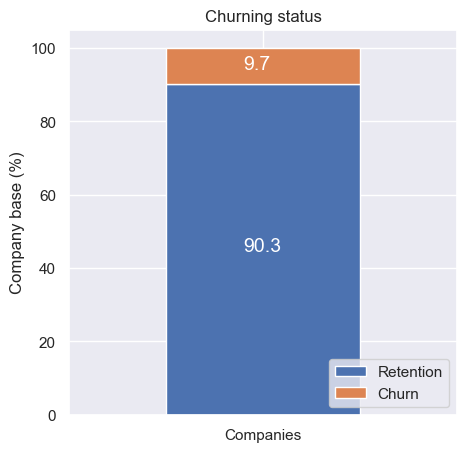

In [15]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
display(churn_percentage)

plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

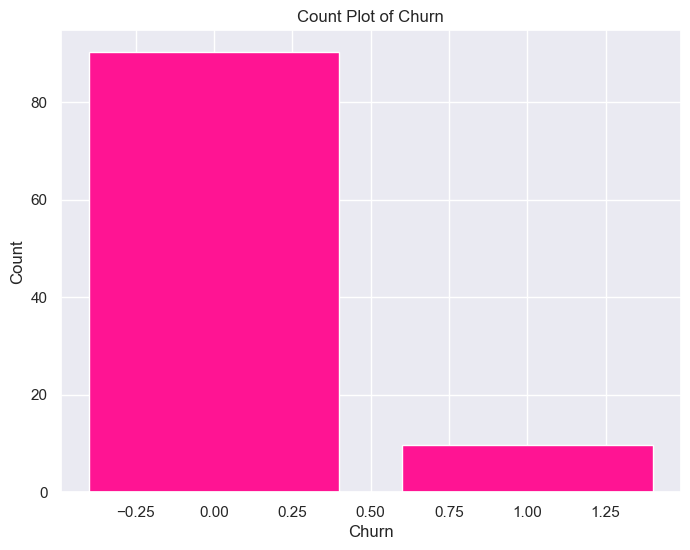

In [16]:
plt.figure(figsize=(8, 6))
plt.bar(churn_percentage.index, churn_percentage['Companies'], color='deeppink')
plt.title('Count Plot of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

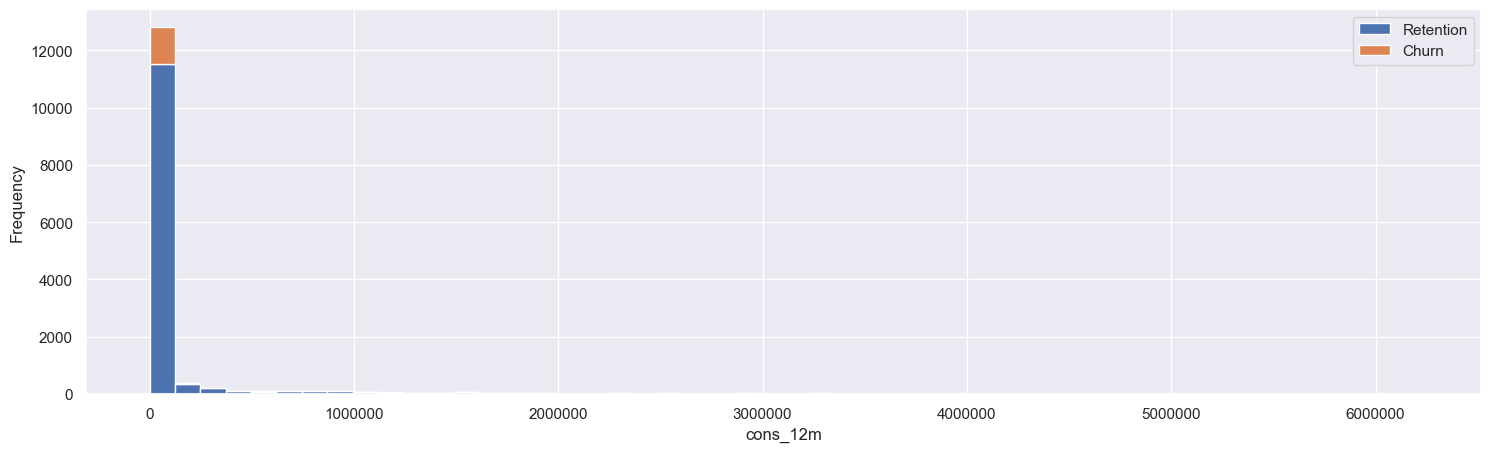

In [17]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

### Categorical
- For `channel_sales` and `origin_up`, could group together categories with very low numbers (< 100 each) as `OTHER` (In case of `MISSING` being such a category, use `MISSING+OTHER`)
- `forecast_discount_energy` and `nb_prod-act` could have categories grouped to become binary features.
- `has_gas` and `churn` are imbalanced, consider using f1-score as metric of measurement later to mitigate this.

/var/folders/sp/136d3tf94ns_hpp_7z4mgphm0000gp/T/ipykernel_87344/806380206.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y[i], y[i])  # Placing text slightly above the bar


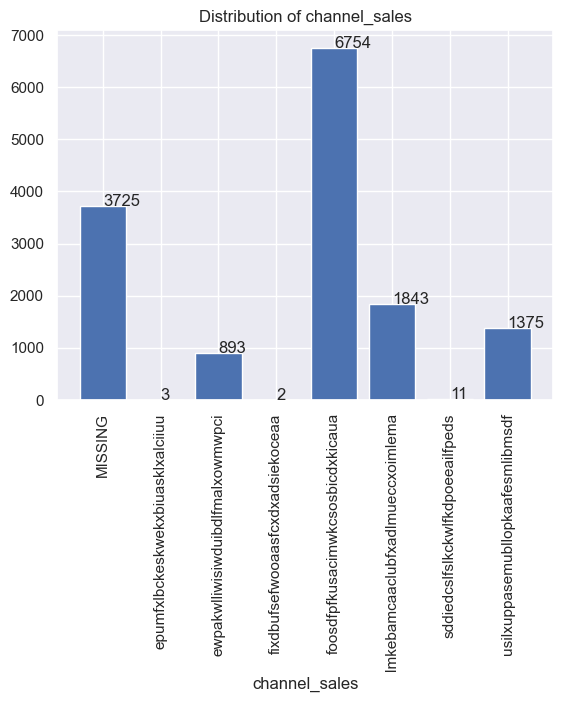

/var/folders/sp/136d3tf94ns_hpp_7z4mgphm0000gp/T/ipykernel_87344/806380206.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y[i], y[i])  # Placing text slightly above the bar


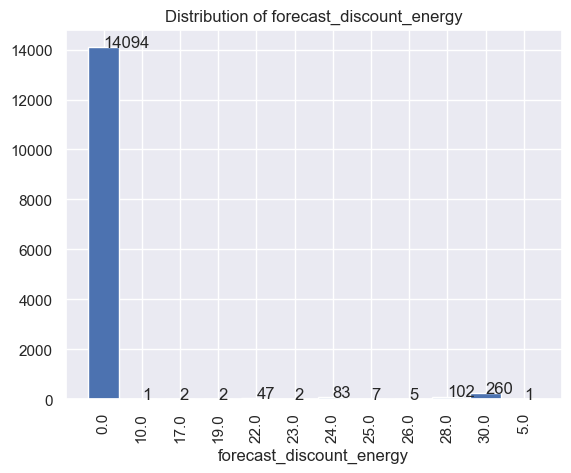

/var/folders/sp/136d3tf94ns_hpp_7z4mgphm0000gp/T/ipykernel_87344/806380206.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y[i], y[i])  # Placing text slightly above the bar


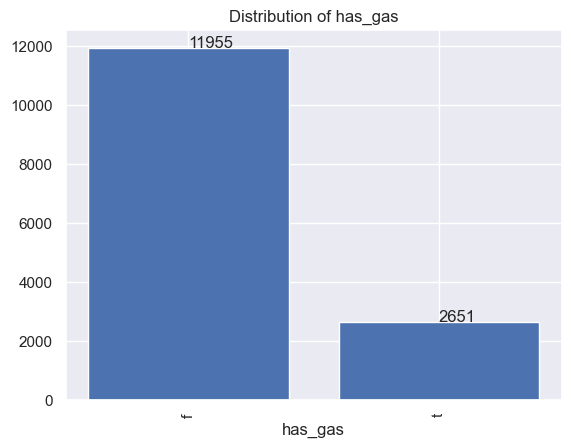

/var/folders/sp/136d3tf94ns_hpp_7z4mgphm0000gp/T/ipykernel_87344/806380206.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y[i], y[i])  # Placing text slightly above the bar


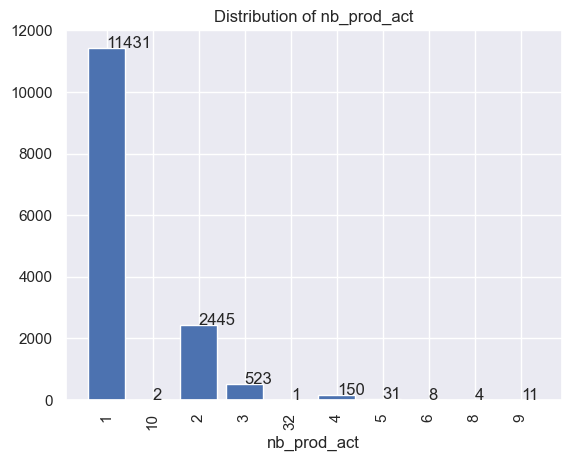

/var/folders/sp/136d3tf94ns_hpp_7z4mgphm0000gp/T/ipykernel_87344/806380206.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y[i], y[i])  # Placing text slightly above the bar


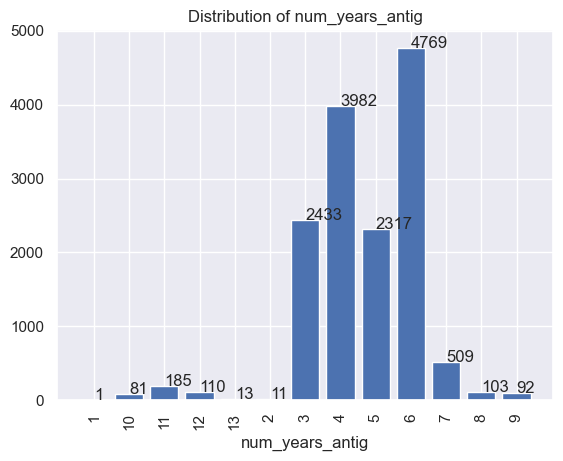

/var/folders/sp/136d3tf94ns_hpp_7z4mgphm0000gp/T/ipykernel_87344/806380206.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y[i], y[i])  # Placing text slightly above the bar


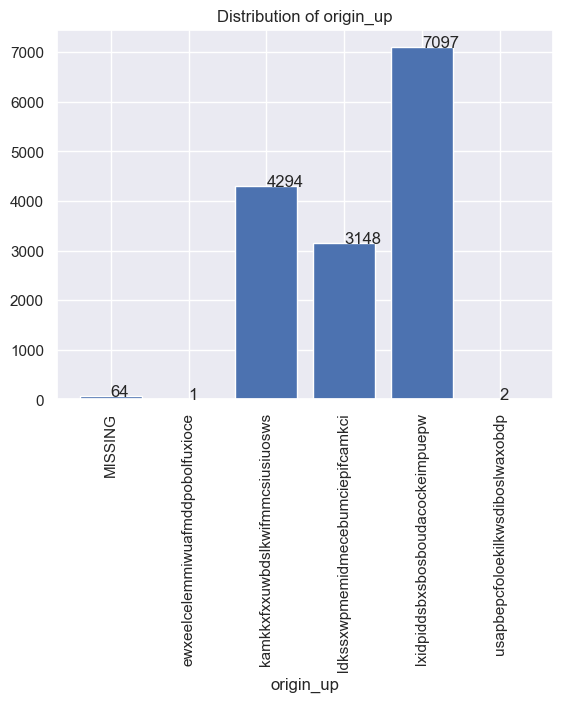

/var/folders/sp/136d3tf94ns_hpp_7z4mgphm0000gp/T/ipykernel_87344/806380206.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y[i], y[i])  # Placing text slightly above the bar


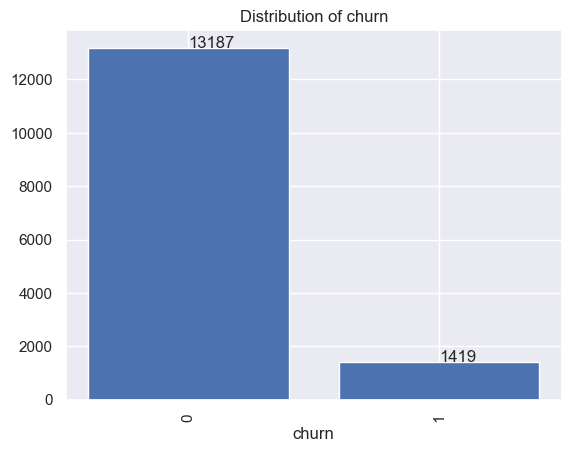

In [18]:
# Bar plots for categorical columns 
# https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
# https://stackoverflow.com/questions/39135472/setting-order-of-columns-with-matplotlib-bar-chart
# https://www.geeksforgeeks.org/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
# https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/

# Function to add value labels on top of bars
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i])  # Placing text slightly above the bar

for i in range(0,len(categorical_cols_client)):
    f = categorical_cols_client[i]
    frame = client_df[f].astype("string")
    f_cats = frame.value_counts().sort_index()
    plt.bar(f_cats.index, f_cats)
    add_labels(f_cats.index, f_cats)
    plt.xlabel(f)
    plt.xticks(rotation = 90)
    plt.title("Distribution of " + f.lower()) 
    plt.show() 

### Numeric -- Client
- Many of these features have extremely skewed values, and thus have a different set of visualisations to remove outliers and provide better detail.
- The majority of numeric features in the client data are heavily skewed to the right, with the exceptions of `forecast_meter_rent_12m`, `forecast_price_energy_off_peak`, `forecast_price_energy_peak`, `forecast_price_pow_off_peak`.

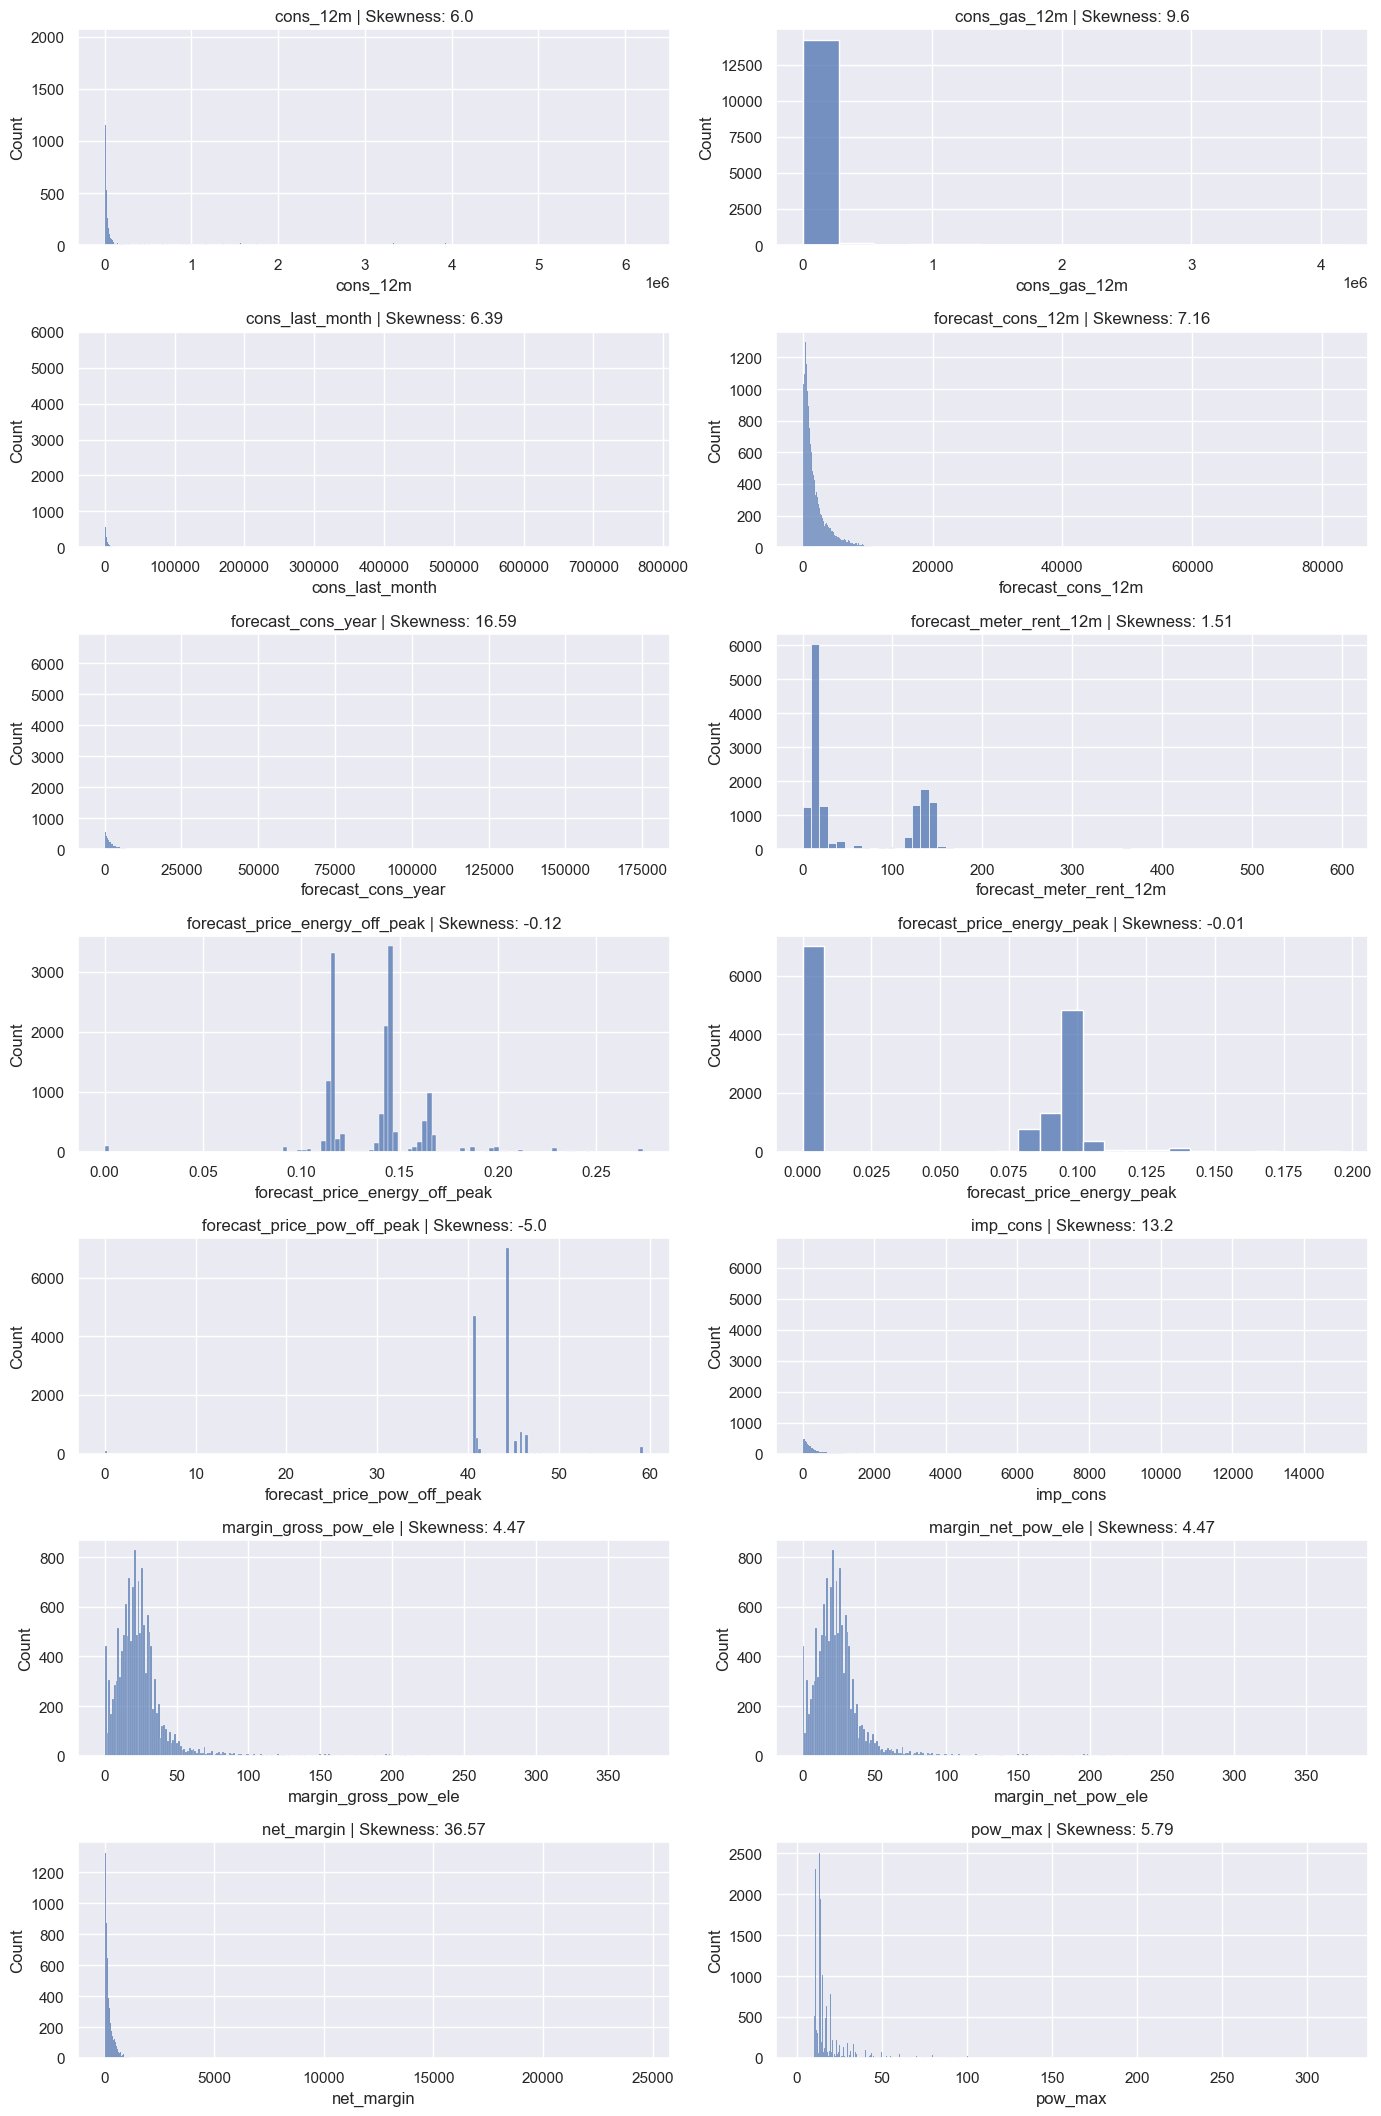

In [19]:
# https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/

sns.set_style("darkgrid")

# numerical_columns_client = client_df.select_dtypes(include=["int64", "float64"]).columns
numerical_columns_client = [col for col in client_df.select_dtypes(include=["int64", "float64"]).columns if col not in categorical_cols_client]

plt.figure(figsize=(14, len(numerical_columns_client) * 3))
for idx, feature in enumerate(numerical_columns_client, 1):
    plt.subplot(len(numerical_columns_client), 2, idx)
    sns.histplot(client_df[feature], kde=False)
    plt.title(f"{feature} | Skewness: {round(client_df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

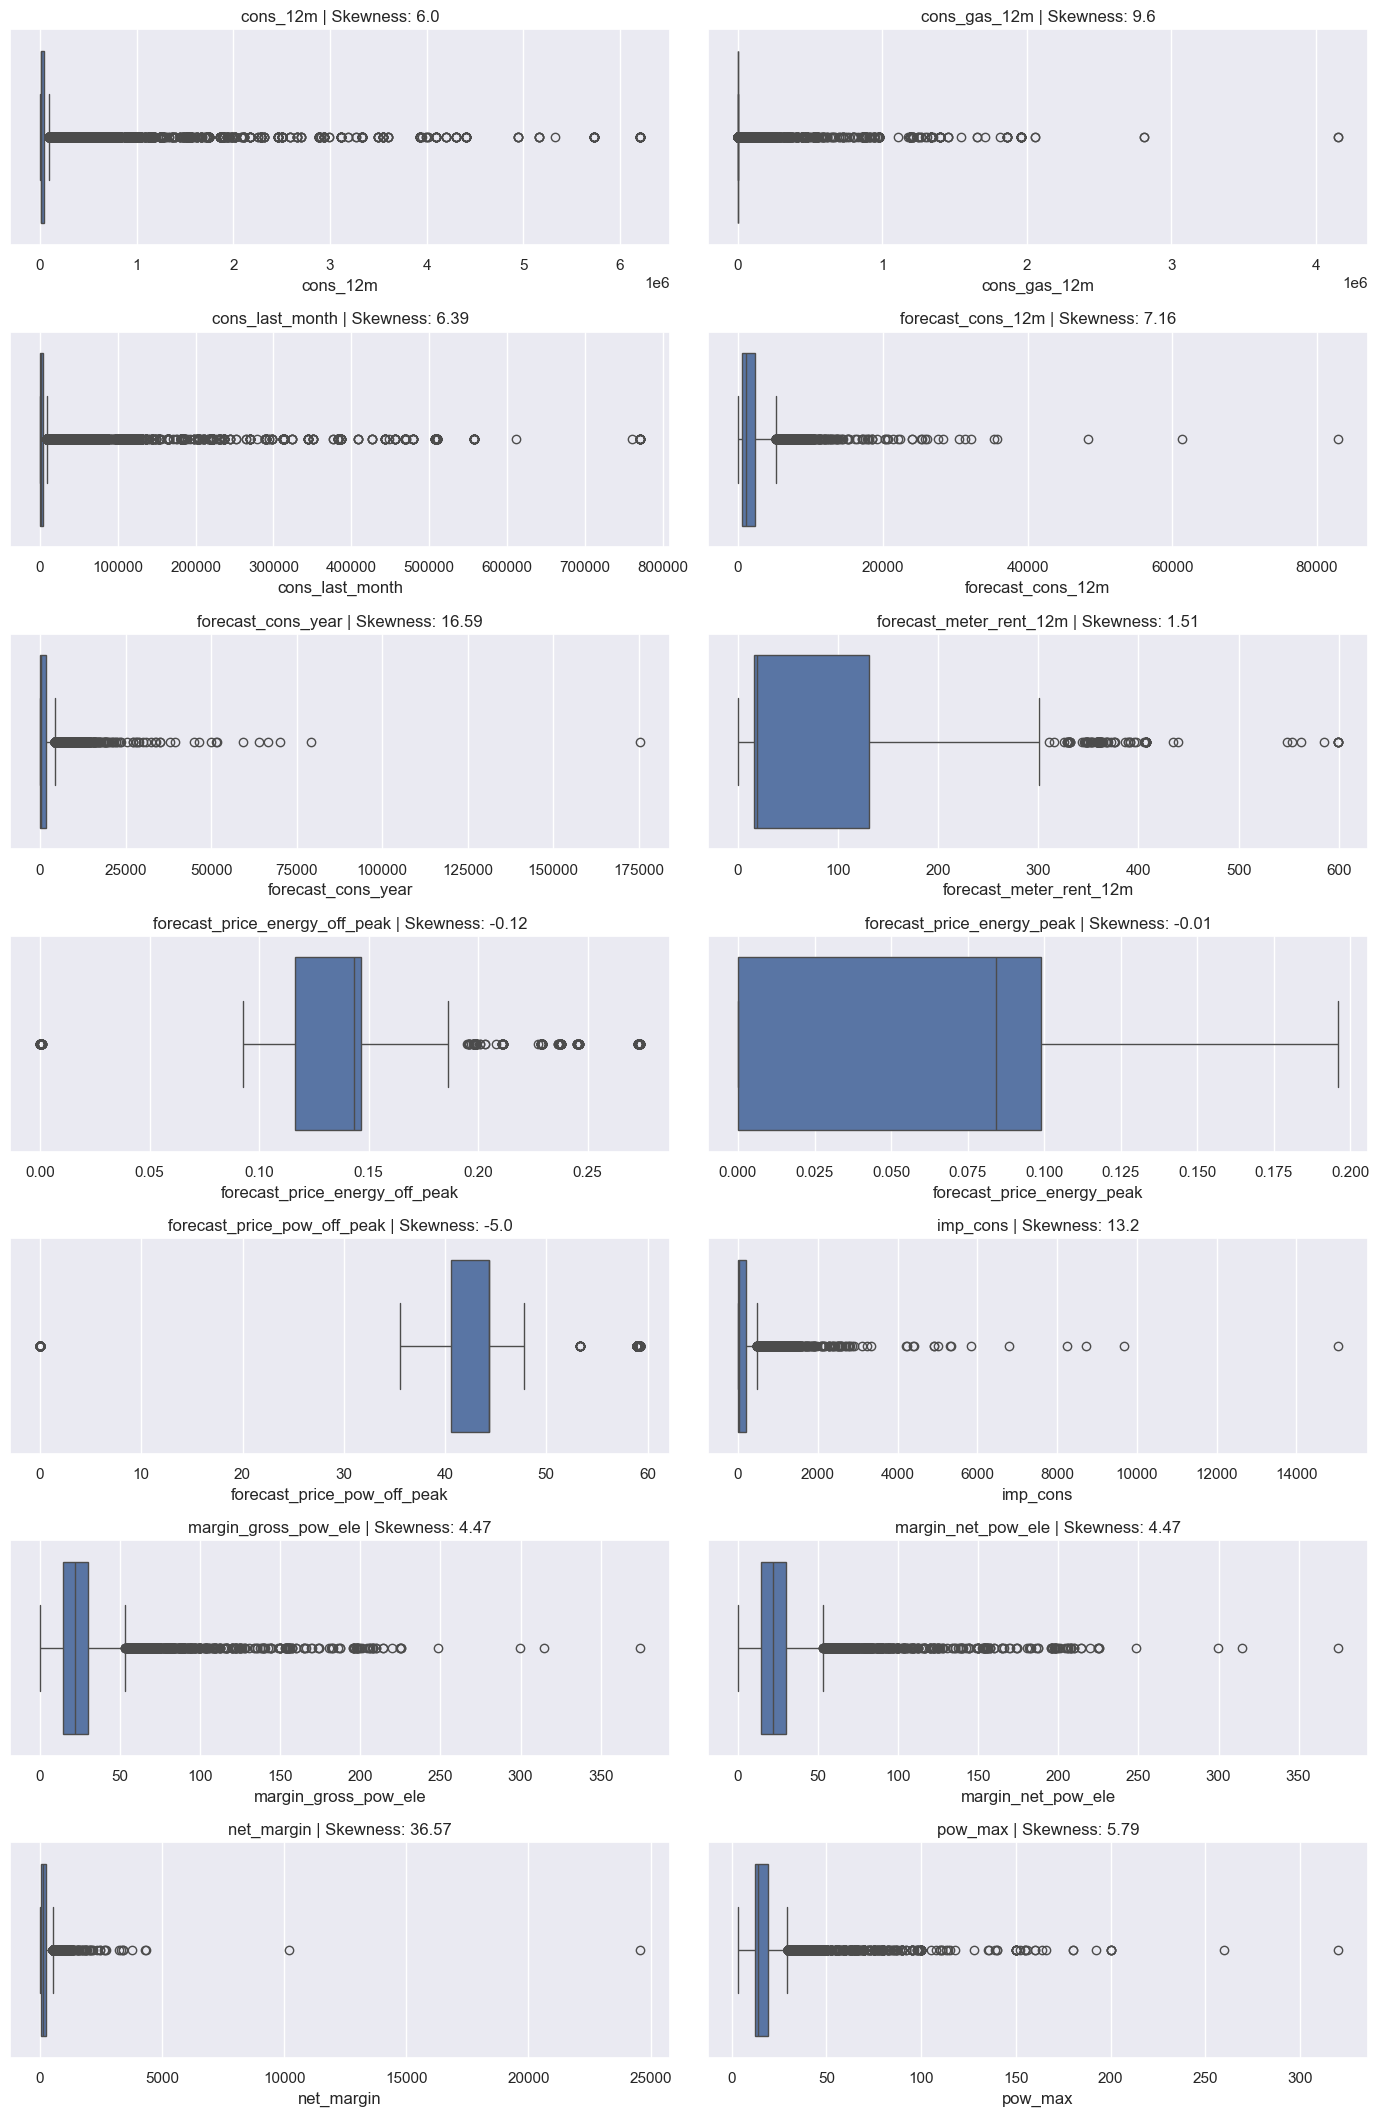

In [20]:
# https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/

sns.set_style("darkgrid")

# numerical_columns_client = client_df.select_dtypes(include=["int64", "float64"]).columns
numerical_columns_client = [col for col in client_df.select_dtypes(include=["int64", "float64"]).columns if col not in categorical_cols_client]

plt.figure(figsize=(14, len(numerical_columns_client) * 3))
for idx, feature in enumerate(numerical_columns_client, 1):
    plt.subplot(len(numerical_columns_client), 2, idx)
    sns.boxplot(x=client_df[feature])
    plt.title(f"{feature} | Skewness: {round(client_df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

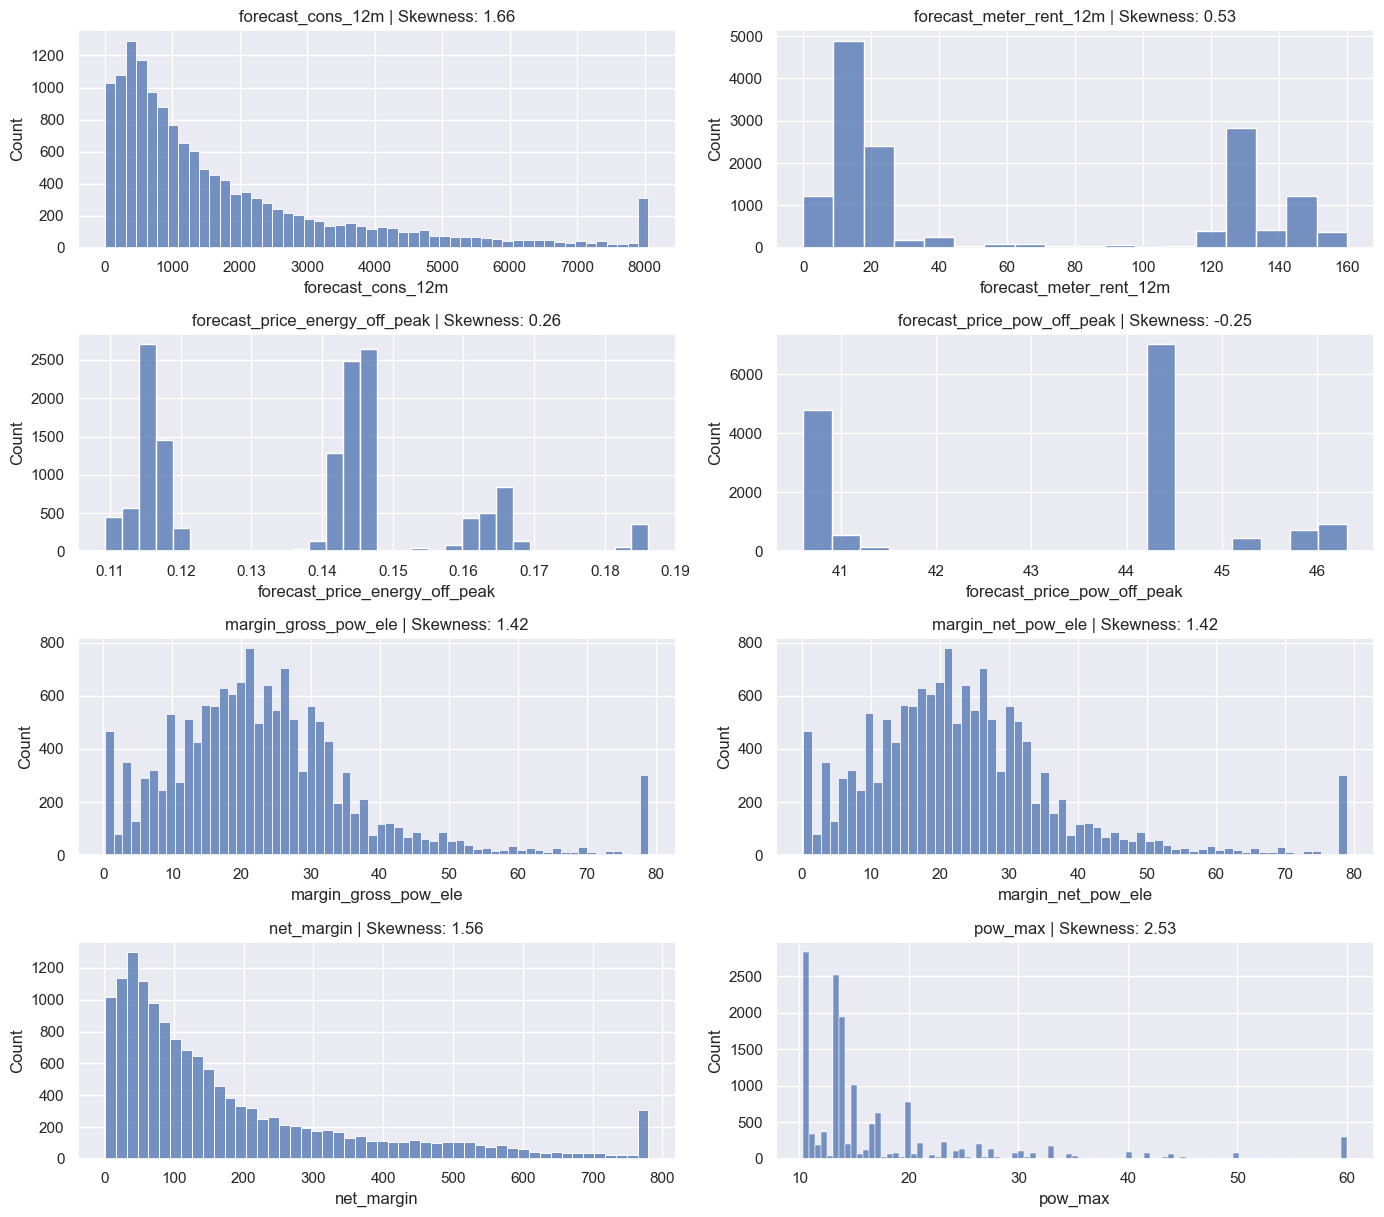

In [21]:
# https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/

sns.set_style("darkgrid")

numerical_columns_client_outliers_1 = ["forecast_cons_12m", "forecast_meter_rent_12m", "forecast_price_energy_off_peak", "forecast_price_pow_off_peak", "margin_gross_pow_ele", "margin_net_pow_ele", "net_margin", "pow_max",]

plt.figure(figsize=(14, len(numerical_columns_client_outliers_1) * 3))
for idx, feature in enumerate(numerical_columns_client_outliers_1, 1):
    plt.subplot(len(numerical_columns_client_outliers_1), 2, idx)

    lower = client_df[feature].quantile(0.02)
    upper = client_df[feature].quantile(0.98)
    data = client_df[feature].clip(lower, upper)
    
    sns.histplot(data, kde=False)
    plt.title(f"{feature} | Skewness: {round(data.skew(), 2)}")

plt.tight_layout()
plt.show()

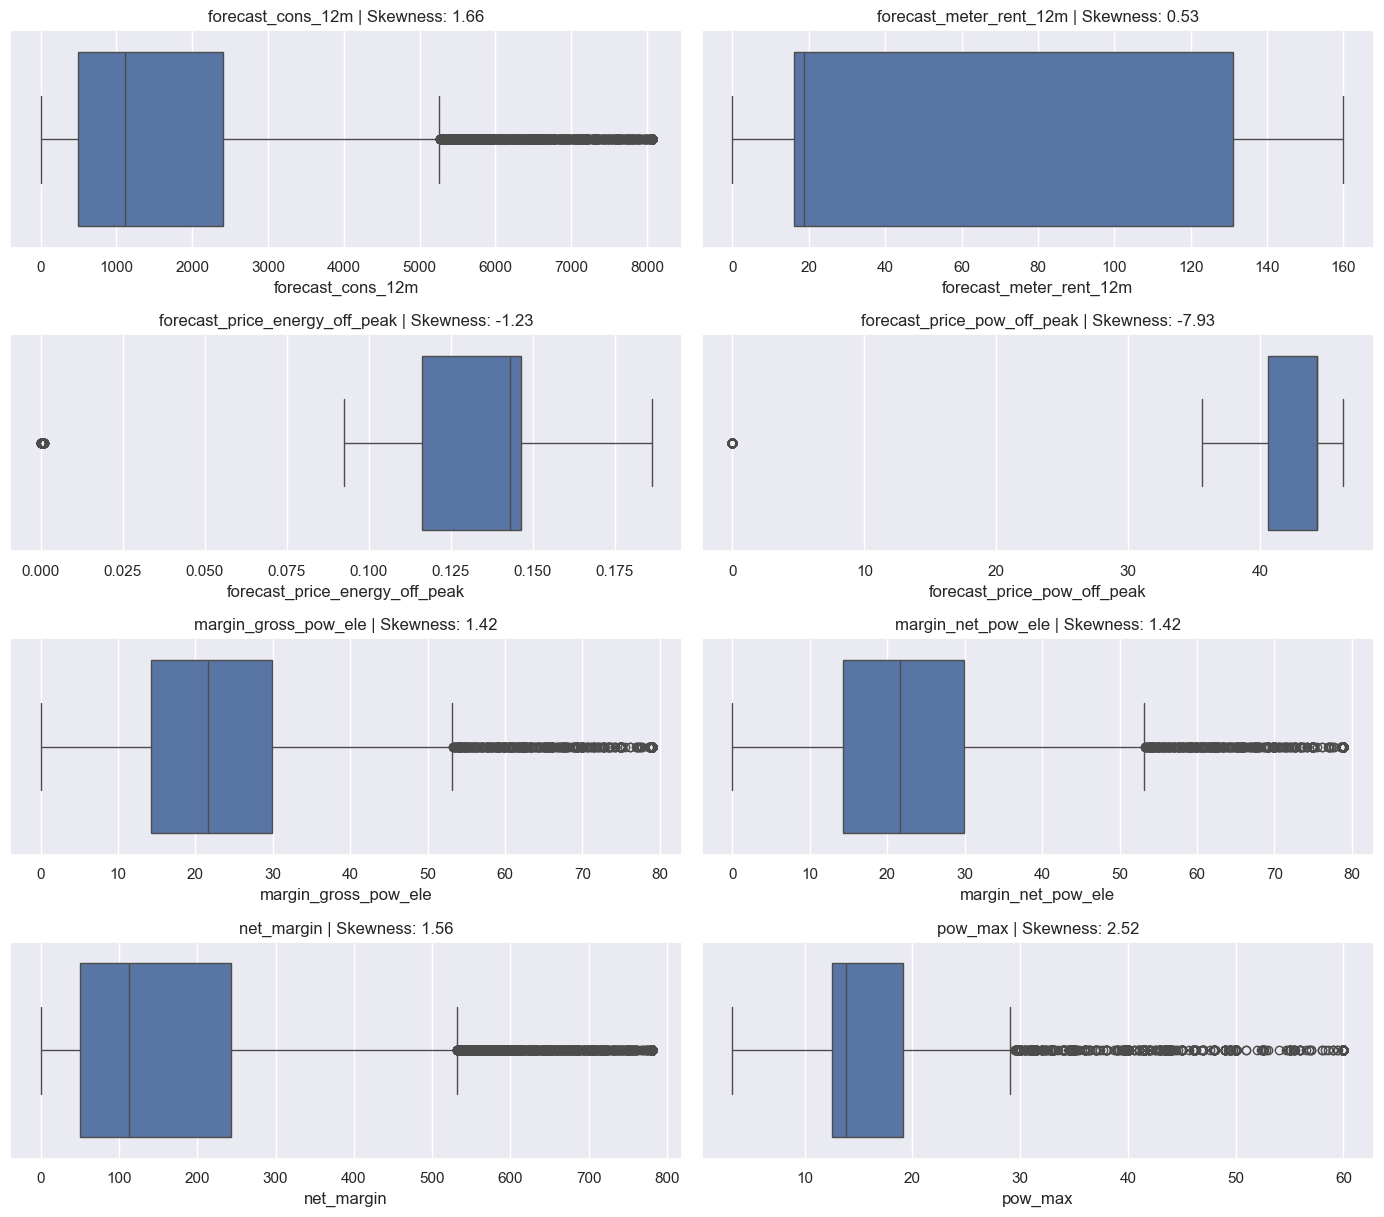

In [30]:
# https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/

sns.set_style("darkgrid")

numerical_columns_client_outliers_1 = ["forecast_cons_12m", "forecast_meter_rent_12m", "forecast_price_energy_off_peak", "forecast_price_pow_off_peak", "margin_gross_pow_ele", "margin_net_pow_ele", "net_margin", "pow_max",]

plt.figure(figsize=(14, len(numerical_columns_client_outliers_1) * 3))
for idx, feature in enumerate(numerical_columns_client_outliers_1, 1):
    plt.subplot(len(numerical_columns_client_outliers_1), 2, idx)

    lower = client_df[feature].quantile(0.00)
    upper = client_df[feature].quantile(0.98)
    data = client_df[feature].clip(lower, upper)
    
    sns.boxplot(x=data)
    plt.title(f"{feature} | Skewness: {round(data.skew(), 2)}")

plt.tight_layout()
plt.show()

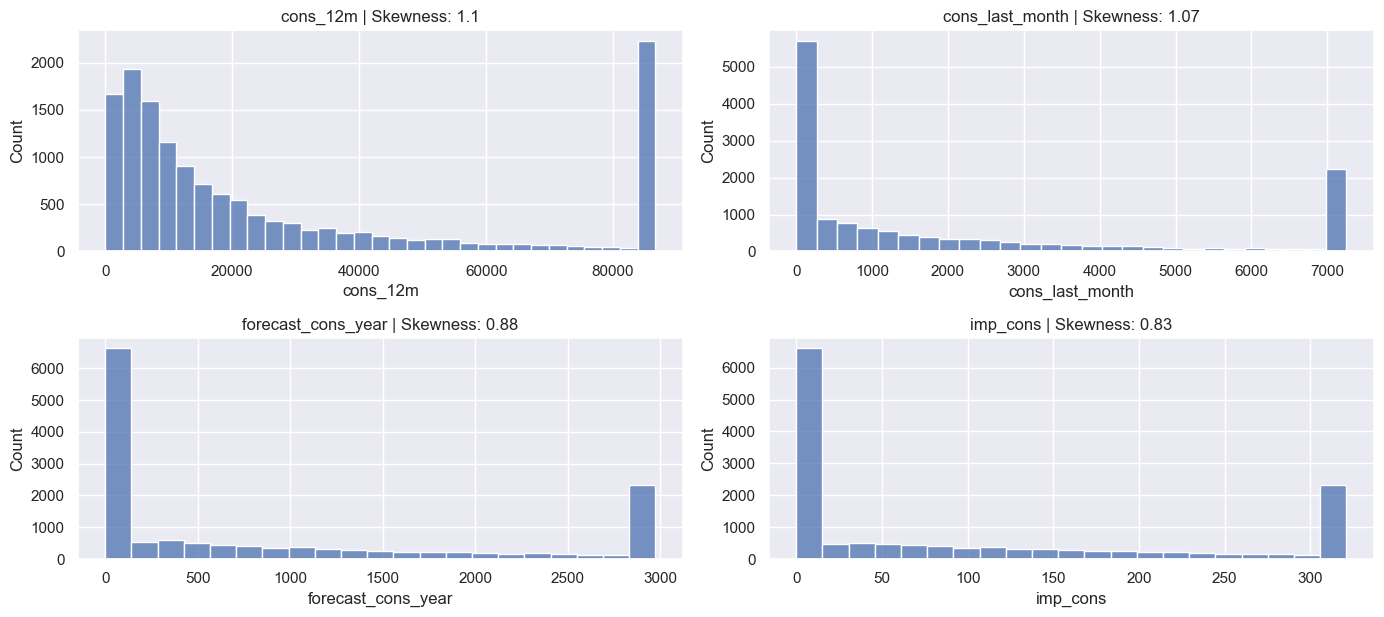

In [23]:
# https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/

sns.set_style("darkgrid")

numerical_columns_client_outliers_2 = ["cons_12m", "cons_last_month", "forecast_cons_year", "imp_cons", ]

plt.figure(figsize=(14, len(numerical_columns_client_outliers_2) * 3))
for idx, feature in enumerate(numerical_columns_client_outliers_2, 1):
    plt.subplot(len(numerical_columns_client_outliers_2), 2, idx)

    lower = client_df[feature].quantile(0.00)
    upper = client_df[feature].quantile(0.85)
    data = client_df[feature].clip(lower, upper)
    
    sns.histplot(data, kde=False)
    plt.title(f"{feature} | Skewness: {round(data.skew(), 2)}")

plt.tight_layout()
plt.show()

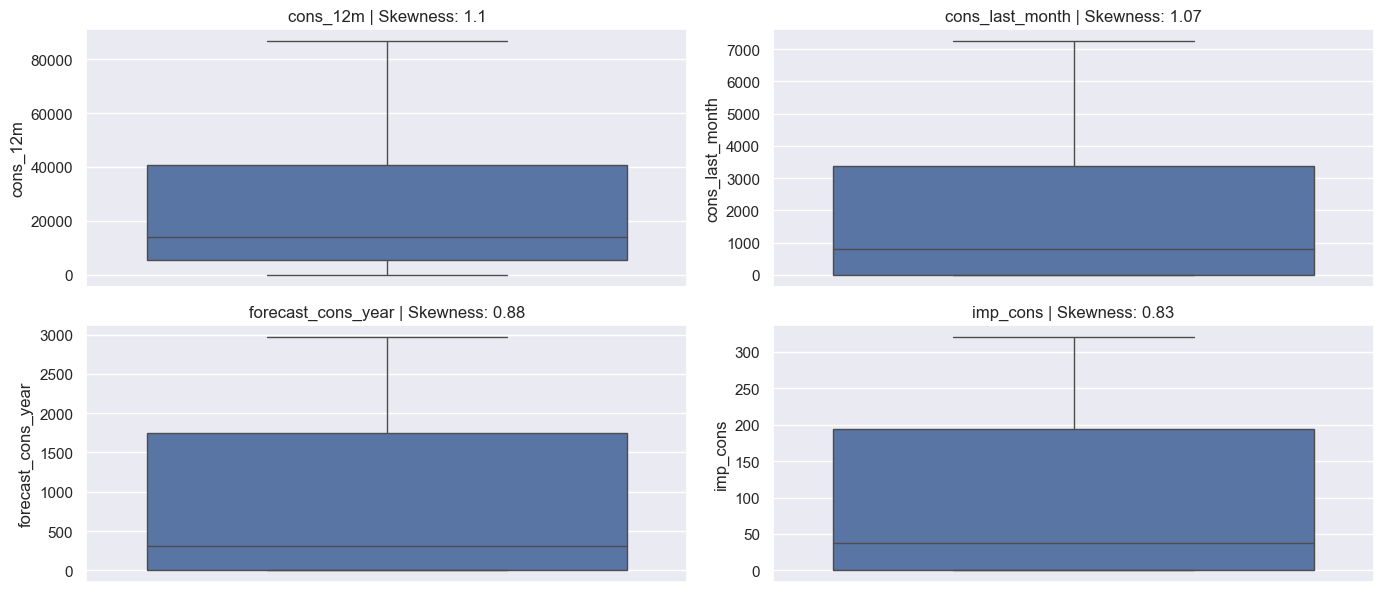

In [24]:
# https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/

sns.set_style("darkgrid")

numerical_columns_client_outliers_2 = ["cons_12m", "cons_last_month", "forecast_cons_year", "imp_cons", ]

plt.figure(figsize=(14, len(numerical_columns_client_outliers_2) * 3))
for idx, feature in enumerate(numerical_columns_client_outliers_2, 1):
    plt.subplot(len(numerical_columns_client_outliers_2), 2, idx)

    lower = client_df[feature].quantile(0.00)
    upper = client_df[feature].quantile(0.85)
    data = client_df[feature].clip(lower, upper)
    
    sns.boxplot(data)
    plt.title(f"{feature} | Skewness: {round(data.skew(), 2)}")

plt.tight_layout()
plt.show()

### Numeric -- Price
- Many of these features have extremely skewed values, and thus have a different set of visualisations to remove outliers and provide better detail.
- `price_off_peak_var` in the price data is skewed to the left.

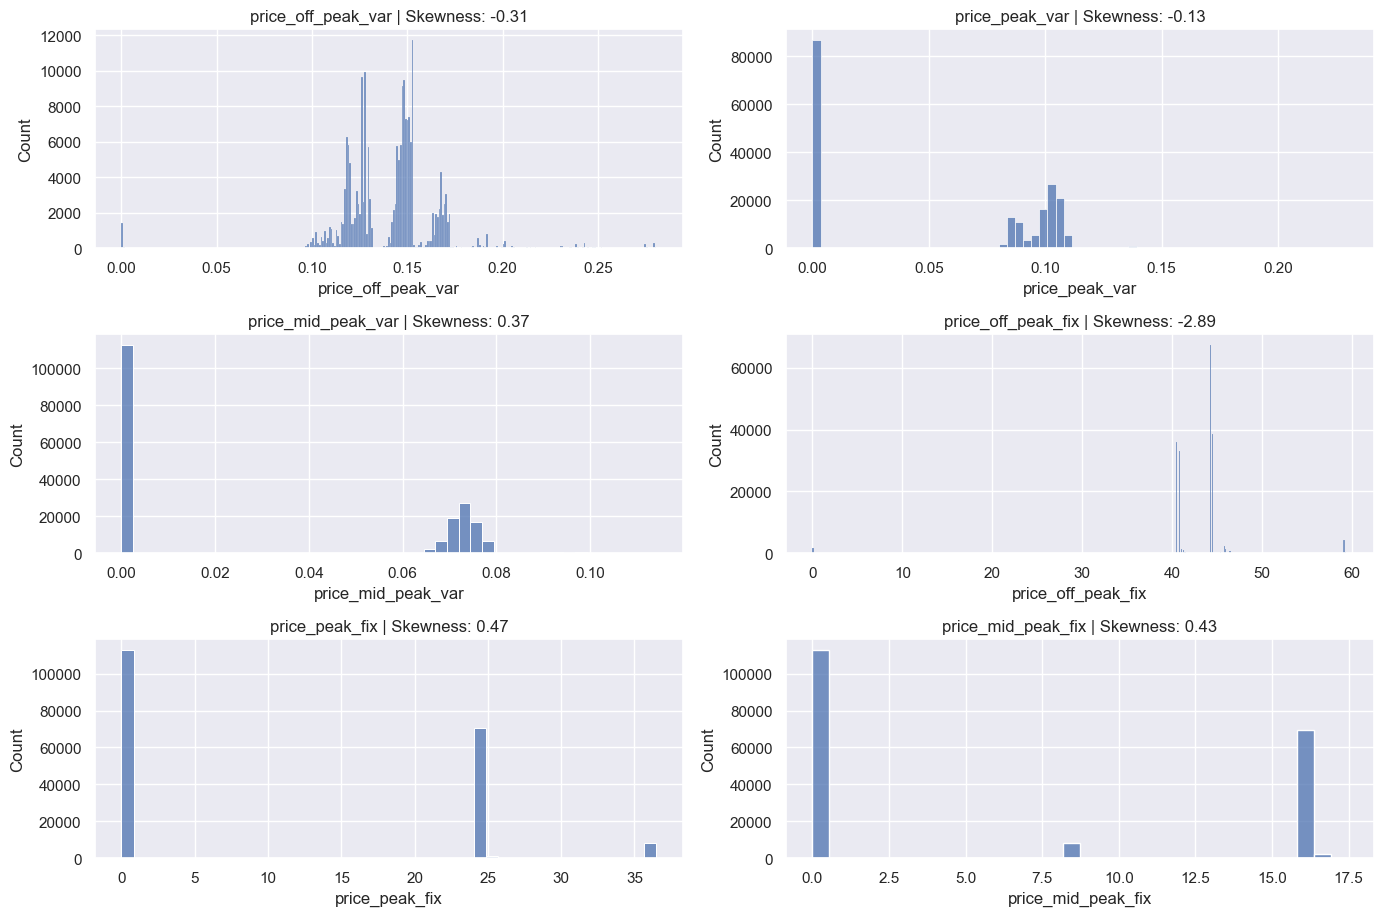

In [25]:
sns.set_style("darkgrid")

# numerical_columns_price = price_df.select_dtypes(include=["int64", "float64"]).columns
numerical_columns_price = [col for col in price_df.select_dtypes(include=["int64", "float64"]).columns if col not in categorical_cols_price]

plt.figure(figsize=(14, len(numerical_columns_price) * 3))
for idx, feature in enumerate(numerical_columns_price, 1):
    plt.subplot(len(numerical_columns_price), 2, idx)
    sns.histplot(price_df[feature], kde=False)
    plt.title(f"{feature} | Skewness: {round(price_df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

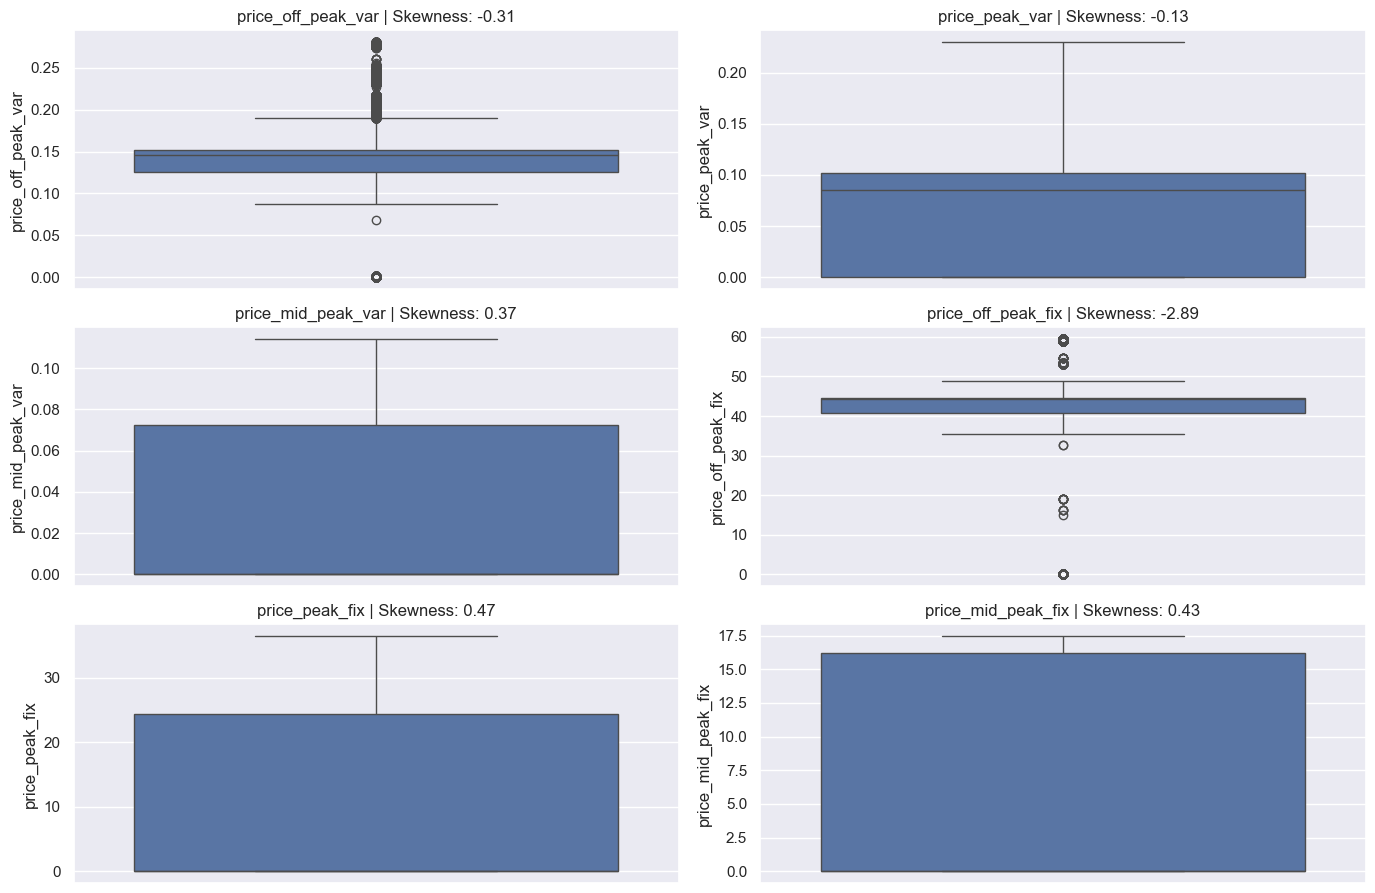

In [26]:
sns.set_style("darkgrid")

# numerical_columns_price = price_df.select_dtypes(include=["int64", "float64"]).columns
numerical_columns_price = [col for col in price_df.select_dtypes(include=["int64", "float64"]).columns if col not in categorical_cols_price]

plt.figure(figsize=(14, len(numerical_columns_price) * 3))
for idx, feature in enumerate(numerical_columns_price, 1):
    plt.subplot(len(numerical_columns_price), 2, idx)
    sns.boxplot(price_df[feature])
    plt.title(f"{feature} | Skewness: {round(price_df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

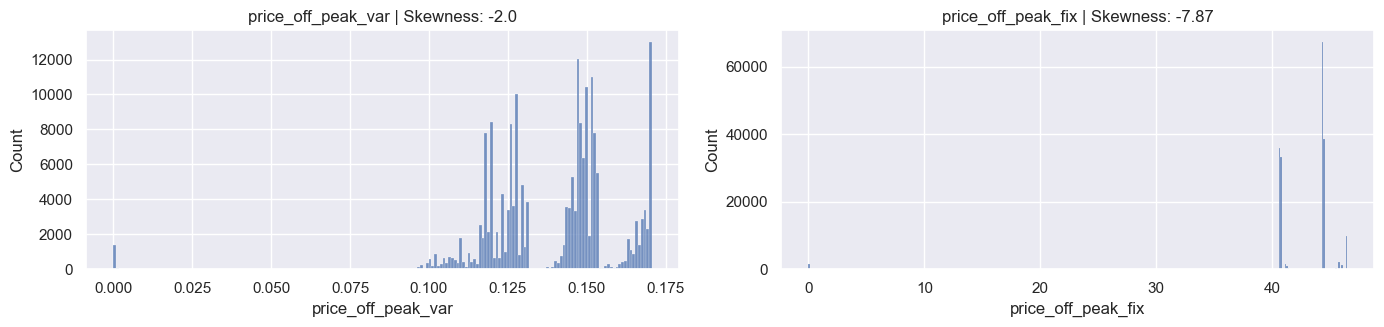

In [27]:
sns.set_style("darkgrid")

numerical_columns_price_outliers_1 = ["price_off_peak_var", "price_off_peak_fix"]

plt.figure(figsize=(14, len(numerical_columns_price_outliers_1) * 3))
for idx, feature in enumerate(numerical_columns_price_outliers_1, 1):
    plt.subplot(len(numerical_columns_price_outliers_1), 2, idx)

    lower = price_df[feature].quantile(0.00)
    upper = price_df[feature].quantile(0.95)
    data = price_df[feature].clip(lower, upper)
    
    sns.histplot(data, kde=False)
    plt.title(f"{feature} | Skewness: {round(data.skew(), 2)}")

plt.tight_layout()
plt.show()

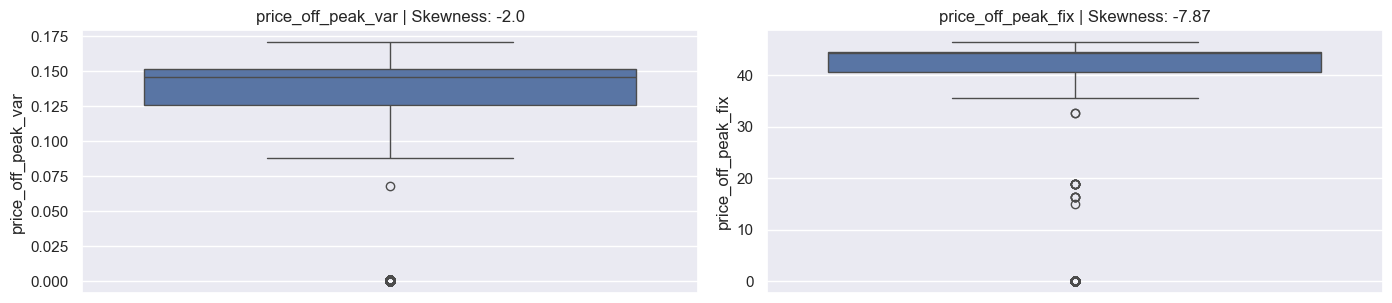

In [28]:
sns.set_style("darkgrid")

numerical_columns_price_outliers_1 = ["price_off_peak_var", "price_off_peak_fix"]

plt.figure(figsize=(14, len(numerical_columns_price_outliers_1) * 3))
for idx, feature in enumerate(numerical_columns_price_outliers_1, 1):
    plt.subplot(len(numerical_columns_price_outliers_1), 2, idx)

    lower = price_df[feature].quantile(0.00)
    upper = price_df[feature].quantile(0.95)
    data = price_df[feature].clip(lower, upper)
    
    sns.boxplot(data)
    plt.title(f"{feature} | Skewness: {round(data.skew(), 2)}")

plt.tight_layout()
plt.show()